In [ ]:
import pandas as pd #importing pandas libary
import numpy as np #importing numpy libary

In [ ]:
df_1=pd.read_csv("/content/drinks.csv") #reading first dataset
df_1

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,Afghanistan,0,0,0,0.0
1,1,Albania,89,132,54,4.9
2,2,Algeria,25,0,14,0.7
3,3,Andorra,245,138,312,12.4
4,4,Angola,217,57,45,5.9
...,...,...,...,...,...,...
188,188,Venezuela,333,100,3,7.7
189,189,Vietnam,111,2,1,2.0
190,190,Yemen,6,0,0,0.1
191,191,Zambia,32,19,4,2.5


In [ ]:
df_2=pd.read_csv("/content/lifeexpectancy-verbose.csv") #reading second dataset
df_2

,index,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,1990,1990,AMR,Americas,WB_LMI,Lower_middle_income,NIC,Nicaragua,MLE,Male,68,68.00000
1,1,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),PUBLISHED,Published,2012,2012,EUR,Europe,WB_HI,High_income,IRL,Ireland,MLE,Male,69,69.30000
2,2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,EMR,Eastern Mediterranean,WB_LI,Low_income,YEM,Yemen,BTSX,Both sexes,61,61.00000
3,3,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,AFR,Africa,WB_LMI,Lower_middle_income,NGA,Nigeria,FMLE,Female,48,48.00000
4,4,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,1990,1990,SEAR,South_East Asia,WB_LMI,Lower_middle_income,THA,Thailand,FMLE,Female,19,19.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403,6403,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2000,2000,EMR,Eastern Mediterranean,WB_LMI,Lower_middle_income,MAR,Morocco,BTSX,Both sexes,68,68.00000
6404,6404,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,1990,1990,WPR,Western Pacific,WB_UMI,Upper_middle_income,PLW,Palau,BTSX,Both sexes,16,16.00000
6405,6405,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,1990,1990,AFR,Africa,WB_LI,Low_income,BFA,Burkina Faso,FMLE,Female,51,51.00000
6406,6406,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),PUBLISHED,Published,2012,2012,EUR,Europe,WB_LMI,Lower_middle_income,ALB,Albania,MLE,Male,64,63.50000


In [ ]:
df_1=df_1.drop('index',axis=1) #dropping the index column as they are duplicated
df_2=df_2.drop('index',axis=1)

In [ ]:
df_2['GhoDisplay'].unique() # checking the column values.

array(['Life expectancy at birth (years)',
       'Healthy life expectancy (HALE) at birth (years)',
       'Life expectancy at age 60 (years)'], dtype=object)

In [ ]:
df_1.isnull().sum() #checking the  null values of dataset

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [ ]:
df_2.isnull().sum() #checking the  null values of dataset

GhoCode                             0
GhoDisplay                          0
PublishStateCode                    0
PublishStateDisplay                 0
YearCode                            0
YearDisplay                         0
RegionCode                          0
RegionDisplay                       0
WorldBankIncomeGroupGroupCode    1164
WorldBankIncomeGroupDisplay      1164
CountryCode                         0
CountryDisplay                      0
SexCode                             0
SexDisplay                          0
DisplayValue                        0
Numeric                             0
dtype: int64

I am going to fill in the nan values with the most frequent values. So I am using "Counter" libary.

In [ ]:
from collections import Counter
first_nan_column=df_2['WorldBankIncomeGroupGroupCode']
counter_1 = Counter(first_nan_column)
most_common_1 = counter_1.most_common(1)

second_nan_column=df_2['WorldBankIncomeGroupDisplay']
counter_2 = Counter(second_nan_column)
most_common_2 = counter_2.most_common(1)
most_common_1,most_common_2

([('WB_LMI', 1440)], [('Lower_middle_income', 1440)])

In [ ]:
df_2['WorldBankIncomeGroupGroupCode']=df_2['WorldBankIncomeGroupGroupCode'].fillna(most_common_1[0][0])
df_2['WorldBankIncomeGroupDisplay']=df_2['WorldBankIncomeGroupDisplay'].fillna(most_common_1[0][0])
df_2.isnull().sum()  #using the above code for certain columns with nan values.

GhoCode                          0
GhoDisplay                       0
PublishStateCode                 0
PublishStateDisplay              0
YearCode                         0
YearDisplay                      0
RegionCode                       0
RegionDisplay                    0
WorldBankIncomeGroupGroupCode    0
WorldBankIncomeGroupDisplay      0
CountryCode                      0
CountryDisplay                   0
SexCode                          0
SexDisplay                       0
DisplayValue                     0
Numeric                          0
dtype: int64

In [ ]:
len(df_2['CountryDisplay'].unique()),len(df_1['country'].unique())  #i can easly concat them, because the number of countrues are almost the same in both datasets

(194, 193)

In [ ]:
df_2=df_2.rename(columns={'CountryDisplay':'country'}) #renaming the column to concat the datasets

In [ ]:
df = pd.merge(df_1, df_2, on='country') #merging the datasets with "country" column

In [ ]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,SexCode,SexDisplay,DisplayValue,Numeric
0,Afghanistan,0,0,0,0.0,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,2000,2000,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,FMLE,Female,16,16.00000
1,Afghanistan,0,0,0,0.0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,WB_LMI,WB_LMI,AFG,MLE,Male,61,60.51228
2,Afghanistan,0,0,0,0.0,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,FMLE,Female,50,49.50000
3,Afghanistan,0,0,0,0.0,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,FMLE,Female,17,17.00000
4,Afghanistan,0,0,0,0.0,WHOSIS_000015,Life expectancy at age 60 (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,MLE,Male,15,15.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506,Zimbabwe,64,18,4,4.7,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),PUBLISHED,Published,2000,2000,AFR,Africa,WB_LI,Low_income,ZWE,MLE,Male,37,37.00000
5507,Zimbabwe,64,18,4,4.7,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,AFR,Africa,WB_LI,Low_income,ZWE,BTSX,Both sexes,58,58.00000
5508,Zimbabwe,64,18,4,4.7,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),PUBLISHED,Published,2013,2013,AFR,Africa,WB_LI,Low_income,ZWE,FMLE,Female,52,51.80000
5509,Zimbabwe,64,18,4,4.7,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,1990,1990,AFR,Africa,WB_LI,Low_income,ZWE,MLE,Male,60,60.00000


In [ ]:
df['PublishStateCode'].unique(), df['PublishStateDisplay'].unique() #the same columns, we need one of them only

(array(['PUBLISHED'], dtype=object), array(['Published'], dtype=object))

In [ ]:
df['PublishStateCode'].unique(), df['PublishStateDisplay'].unique() #we do not need it as it is the same for all.

(array(['PUBLISHED'], dtype=object), array(['Published'], dtype=object))

In [ ]:
df['GhoCode'].unique(),df['GhoDisplay'].unique() #the same columns, we need one of them only

(array(['WHOSIS_000015', 'WHOSIS_000001', 'WHOSIS_000002'], dtype=object),
 array(['Life expectancy at age 60 (years)',
        'Life expectancy at birth (years)',
        'Healthy life expectancy (HALE) at birth (years)'], dtype=object))

In [ ]:
df['WorldBankIncomeGroupGroupCode'].unique(),df['WorldBankIncomeGroupDisplay'].unique() #we keep both

(array(['WB_LI', 'WB_LMI', 'WB_UMI', 'WB_HI'], dtype=object),
 array(['Low_income', 'WB_LMI', 'Lower_middle_income',
        'Upper_middle_income', 'High_income'], dtype=object))

There are some columns which are the same. So If I give encoder, it will be the same numbers. I will delete certain columns. They are duplicates.

In [ ]:
df=df.drop(['SexCode',"CountryCode","PublishStateCode","PublishStateDisplay","GhoDisplay","YearCode","RegionDisplay","Numeric","country"],axis=1) #no need for that columns as ther are duplicated or useless.

In [ ]:
df.head() #checking the first 5 columns

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,YearDisplay,RegionCode,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,SexDisplay,DisplayValue
0,0,0,0,0.0,WHOSIS_000015,2000,EMR,WB_LI,Low_income,Female,16
1,0,0,0,0.0,WHOSIS_000001,2013,EMR,WB_LMI,WB_LMI,Male,61
2,0,0,0,0.0,WHOSIS_000002,2013,EMR,WB_LI,Low_income,Female,50
3,0,0,0,0.0,WHOSIS_000015,2012,EMR,WB_LI,Low_income,Female,17
4,0,0,0,0.0,WHOSIS_000015,2012,EMR,WB_LI,Low_income,Male,15


In [ ]:
df=df.rename(columns={'DisplayValue':'Age_Expectancy'}) #renaming the column for better understanding

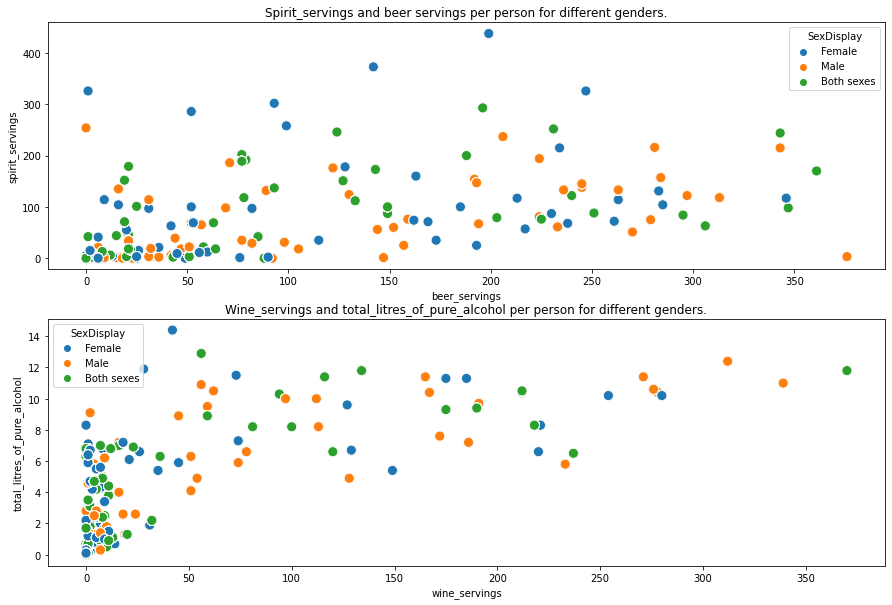

In [ ]:
#We use seaborn libary, scatterplot to see the location of certain data. So we are plotting subplots.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig,ax=plt.subplots(2,1,figsize=(15,10))
ax[0].set_title("Spirit_servings and beer servings per person for different genders.")
sns.scatterplot(ax=ax[0],data=df,x='beer_servings',y="spirit_servings",hue="SexDisplay",s=100)
ax[1].set_title("Wine_servings and total_litres_of_pure_alcohol per person for different genders.")
sns.scatterplot(ax=ax[1],data=df,x="wine_servings",y="total_litres_of_pure_alcohol",hue="SexDisplay",s=100)
plt.show()

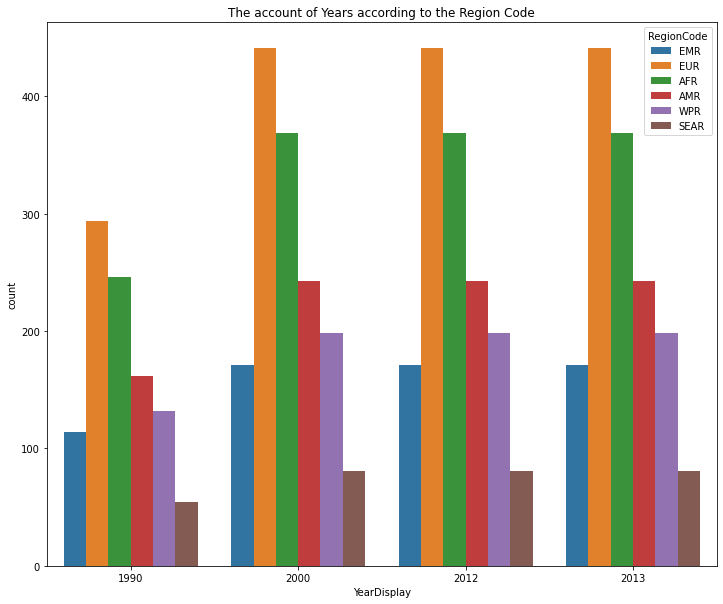

In [ ]:
#count plot is used for displaying the number of certain data
plt.figure(figsize=(12,10))
sns.countplot(x='YearDisplay', hue='RegionCode', data=df)
plt.title("The account of Years according to the Region Code")
plt.show()

In [ ]:
#we will create new column to decrease the number of age categories, so that we can see it better. 

values=[]
for i in df['Age_Expectancy'].values:
    values.append(i)
value=np.unique(values)
intervals=[0,5,15,25,40,60,80]
labels=['0 to 5', '5 to 15','15 to 25','25 to 40','40 to 60','60 to 80']
df['Age_categories']=pd.cut(df['Age_Expectancy'],intervals,labels=labels)
df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,YearDisplay,RegionCode,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,SexDisplay,Age_Expectancy,Age_categories
0,0,0,0,0.0,WHOSIS_000015,2000,EMR,WB_LI,Low_income,Female,16,15 to 25
1,0,0,0,0.0,WHOSIS_000001,2013,EMR,WB_LMI,WB_LMI,Male,61,60 to 80
2,0,0,0,0.0,WHOSIS_000002,2013,EMR,WB_LI,Low_income,Female,50,40 to 60
3,0,0,0,0.0,WHOSIS_000015,2012,EMR,WB_LI,Low_income,Female,17,15 to 25
4,0,0,0,0.0,WHOSIS_000015,2012,EMR,WB_LI,Low_income,Male,15,5 to 15
...,...,...,...,...,...,...,...,...,...,...,...,...
5506,64,18,4,4.7,WHOSIS_000002,2000,AFR,WB_LI,Low_income,Male,37,25 to 40
5507,64,18,4,4.7,WHOSIS_000001,2012,AFR,WB_LI,Low_income,Both sexes,58,40 to 60
5508,64,18,4,4.7,WHOSIS_000002,2013,AFR,WB_LI,Low_income,Female,52,40 to 60
5509,64,18,4,4.7,WHOSIS_000001,1990,AFR,WB_LI,Low_income,Male,60,40 to 60


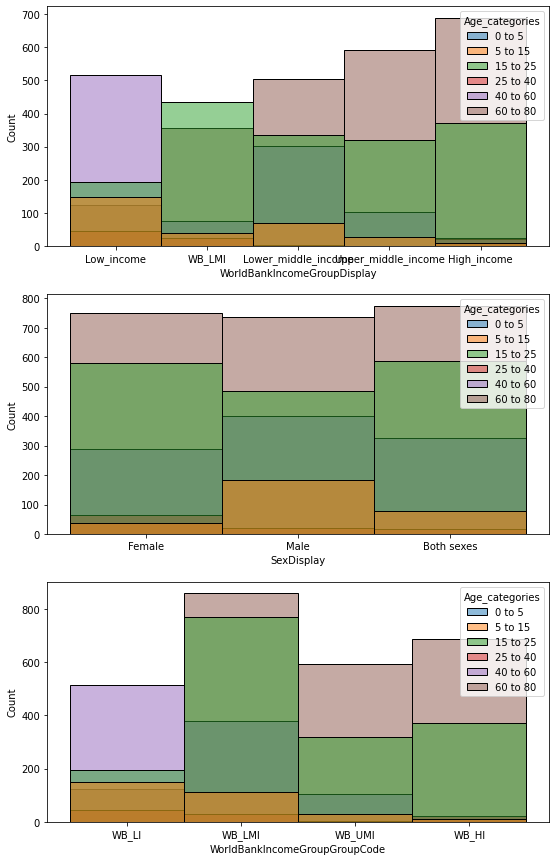

In [ ]:
#we use histplot as it describes the relation between 2 different columns.
fig,ax=plt.subplots(3,1,figsize=(9,15))
sns.histplot(ax=ax[1],data=df,x='SexDisplay',hue='Age_categories')
sns.histplot(ax=ax[0],data=df,x='WorldBankIncomeGroupDisplay',hue='Age_categories')
sns.histplot(ax=ax[2],data=df,x='WorldBankIncomeGroupGroupCode',hue='Age_categories')
plt.show()

In [ ]:
#we need to encode the text data so the algorithm can understand.
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)

In [ ]:
df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,YearDisplay,RegionCode,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,SexDisplay,Age_Expectancy,Age_categories
0,0,0,0,0,2,1,2,1,1,1,5,0
1,0,0,0,0,0,3,2,2,4,2,47,4
2,0,0,0,0,1,3,2,1,1,1,36,2
3,0,0,0,0,2,2,2,1,1,1,6,0
4,0,0,0,0,2,2,2,1,1,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5506,39,14,4,36,1,1,0,1,1,2,23,1
5507,39,14,4,36,0,2,0,1,1,0,44,2
5508,39,14,4,36,1,3,0,1,1,1,38,2
5509,39,14,4,36,0,0,0,1,1,2,46,2


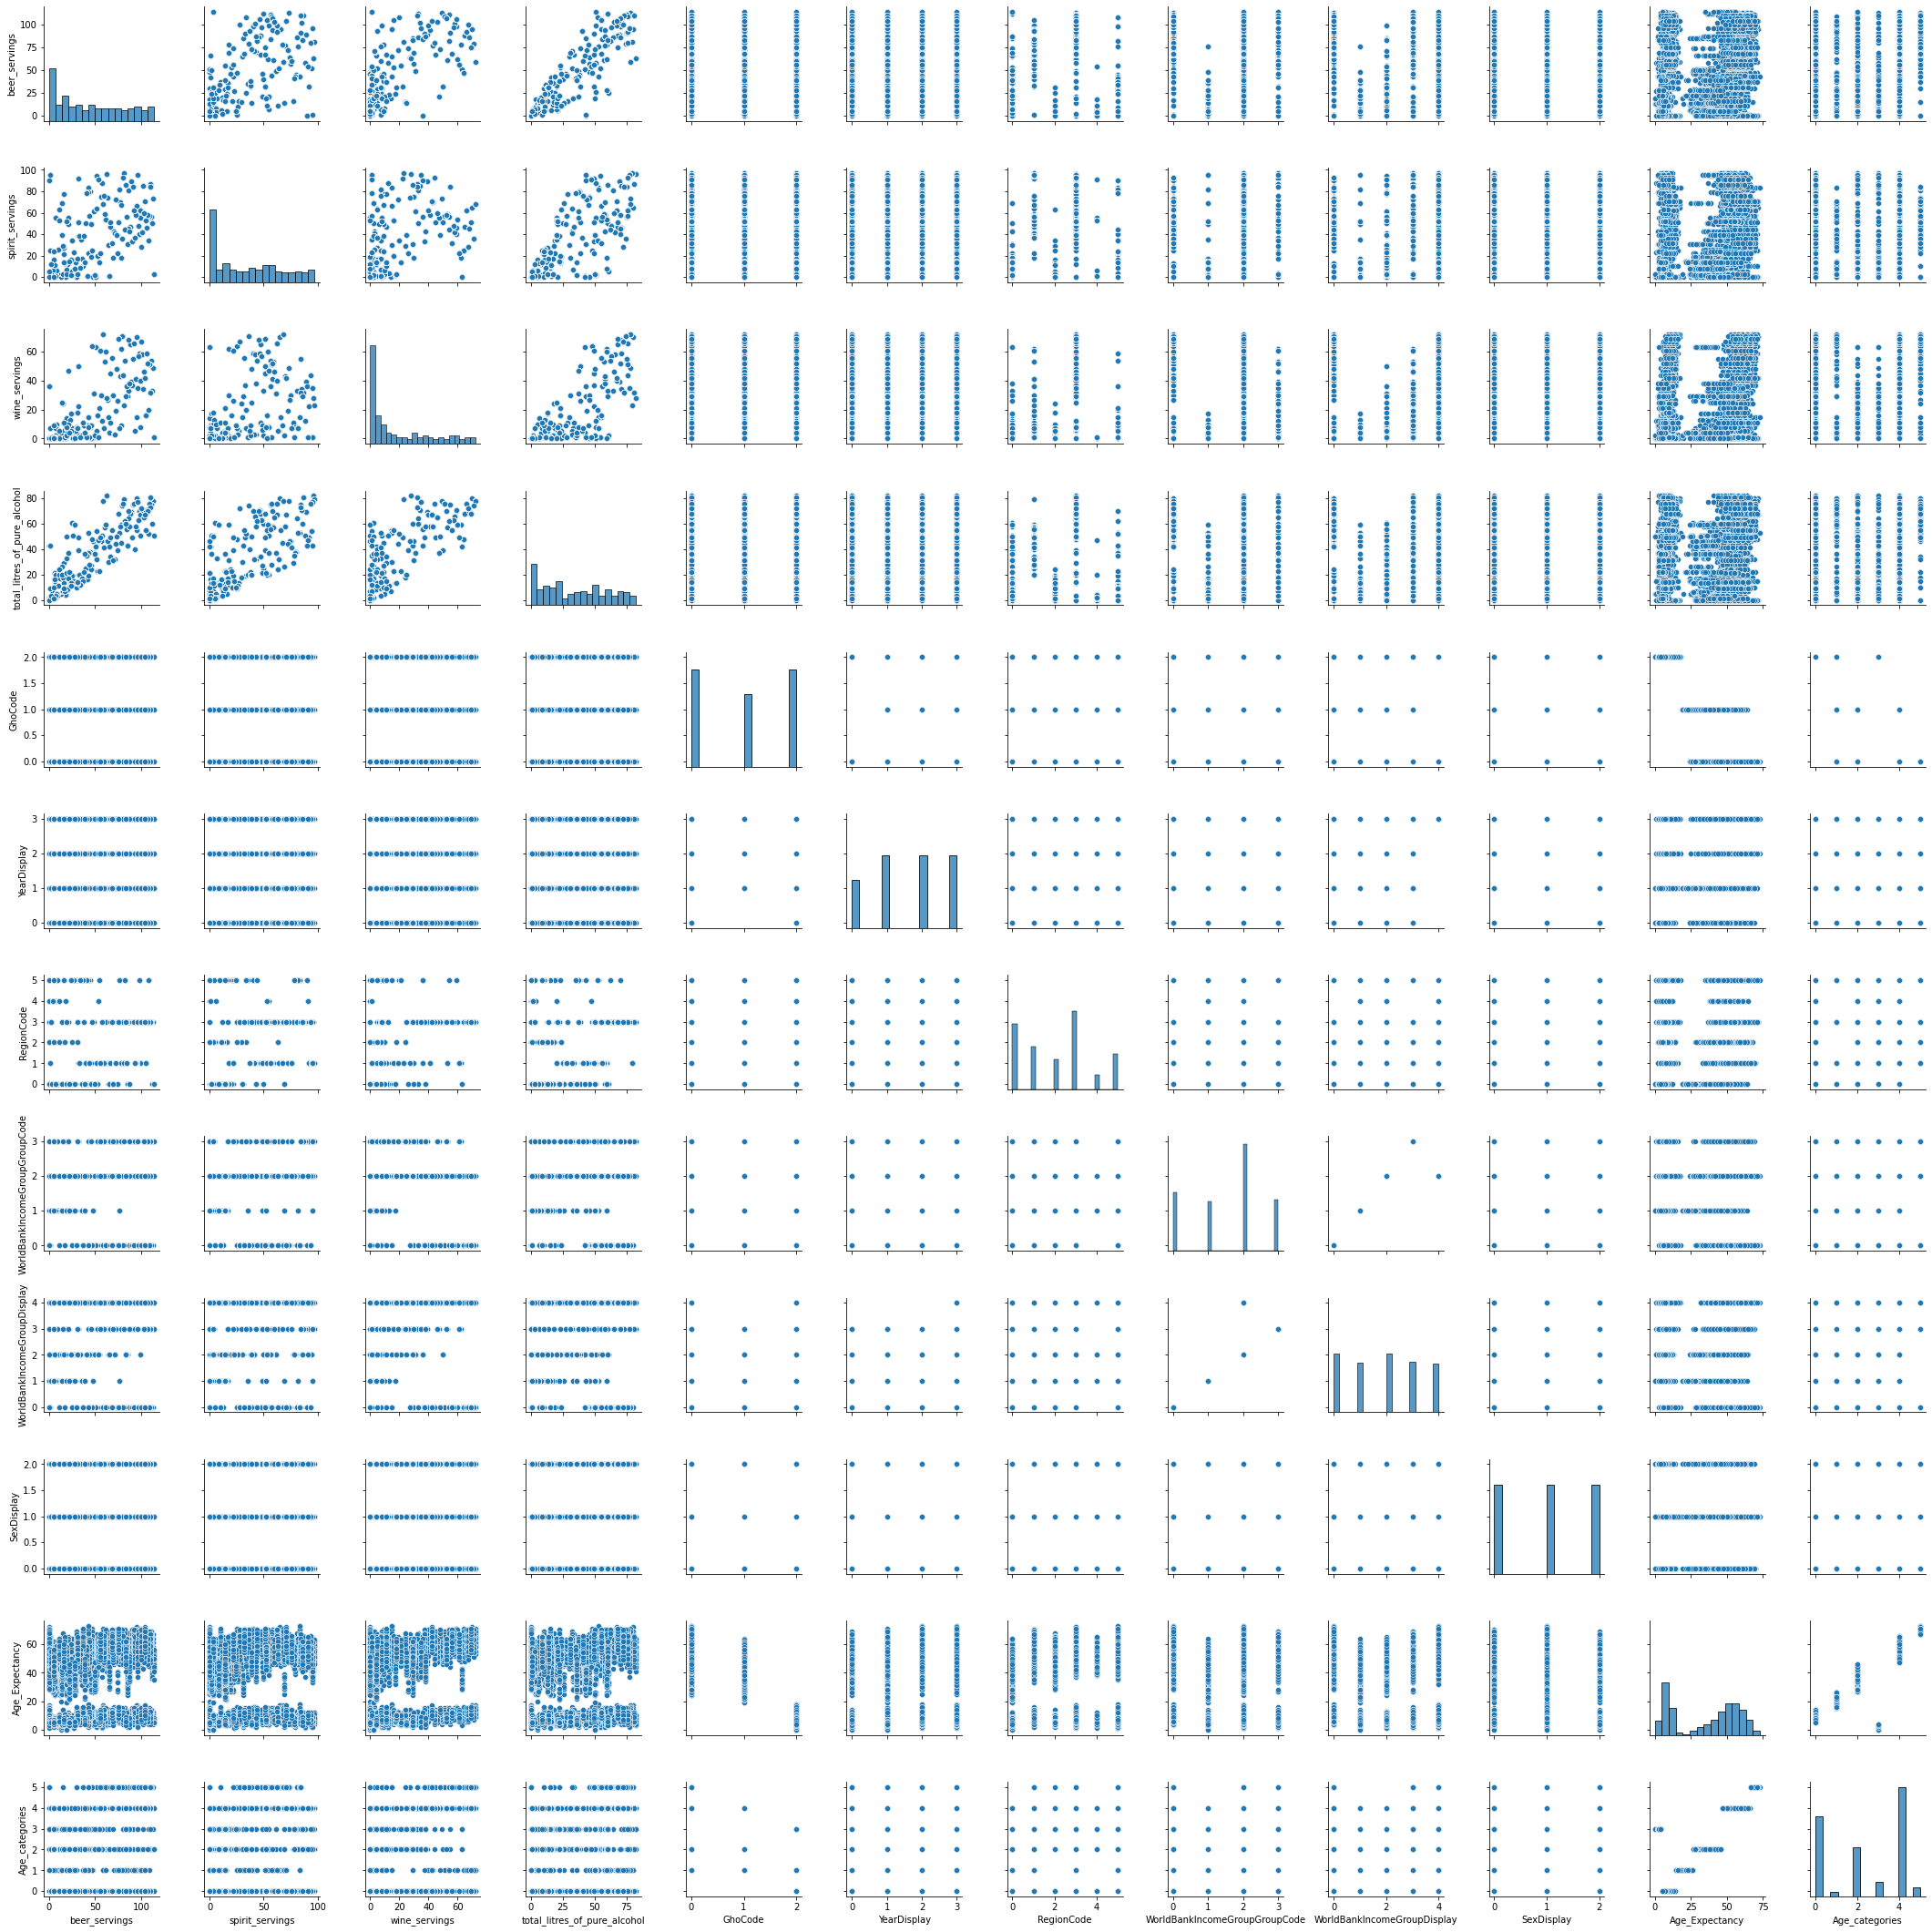

In [ ]:
#a pairplot shows the linerity between the columns
sns.pairplot(df) #let's find the linerity between columns.
plt.show()

In [ ]:
#we do not need that column anymore
df=df.drop("Age_categories",axis=1)

In [ ]:
#calculation the correlation of other columns to the target column.
df.corrwith(df['Age_Expectancy']).abs().sort_values(ascending=False)

Age_Expectancy                   1.000000
GhoCode                          0.886103
wine_servings                    0.160371
RegionCode                       0.143820
spirit_servings                  0.137276
beer_servings                    0.135580
YearDisplay                      0.133257
total_litres_of_pure_alcohol     0.120603
WorldBankIncomeGroupDisplay      0.066008
WorldBankIncomeGroupGroupCode    0.052837
SexDisplay                       0.032895
dtype: float64

[]

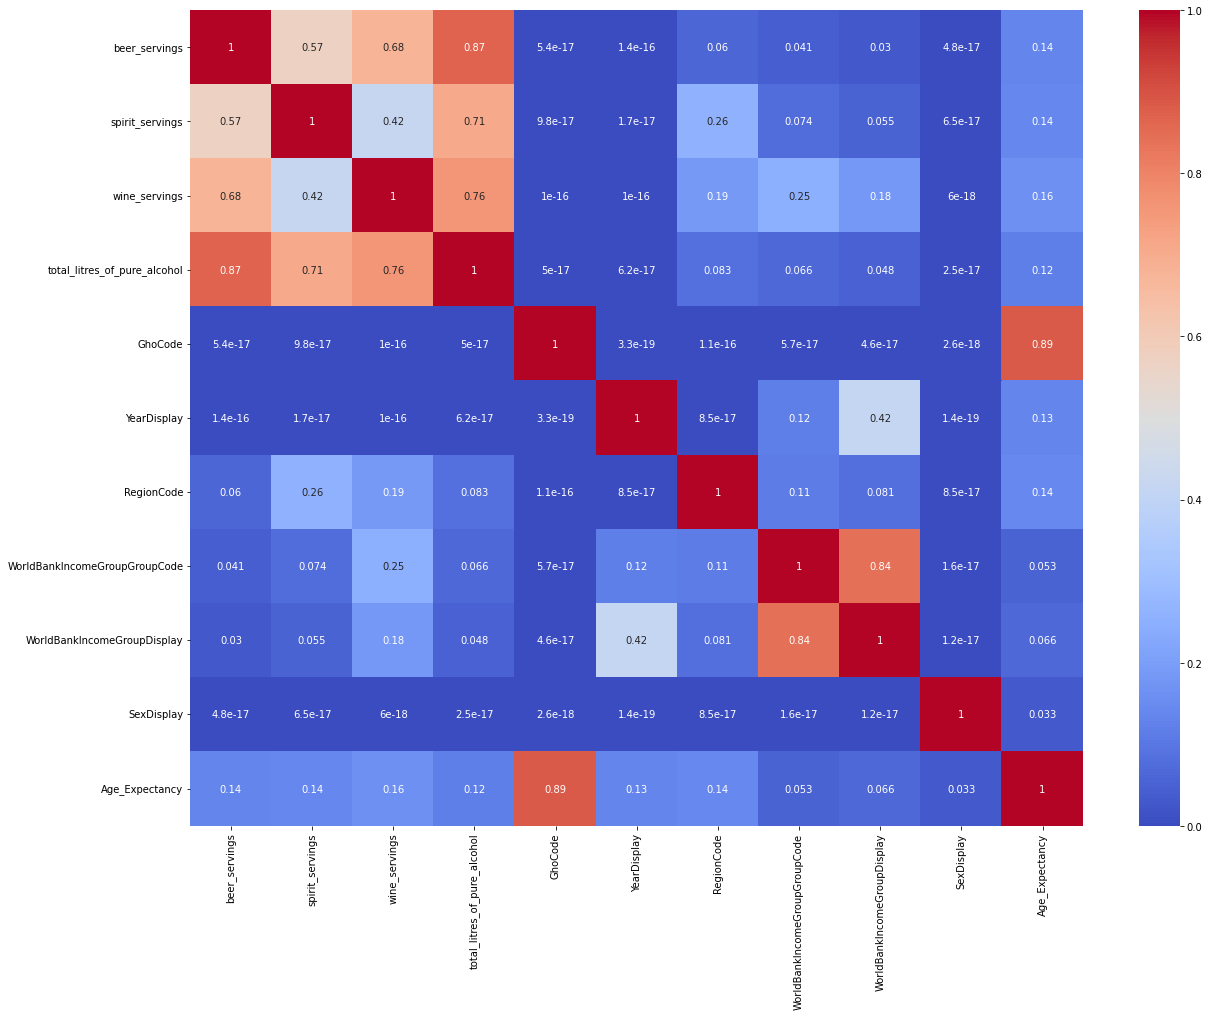

In [ ]:
#correlation is really important, so we plot it with heatmap and see better.
corrm=df.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(corrm, cmap="coolwarm", annot=True)
plt.plot()

In [ ]:
#we identify what is input and what is the supervised output
X=df.drop('Age_Expectancy',axis=1)
Y=df['Age_Expectancy'].copy()

In [ ]:
#Mutual info is also needed to see the correlation, it is an alternative of df.corr()
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, Y)
mutual_info

array([0.29743539, 0.26546514, 0.25904652, 0.29296479, 0.75723222,
       0.03918048, 0.30808736, 0.26360103, 0.29988051, 0.07907286])

In [ ]:
mutual_info = pd.Series(mutual_info) 
mutual_info.index = X.columns
milist=mutual_info.sort_values(ascending=False)
milist  

GhoCode                          0.757232
RegionCode                       0.308087
WorldBankIncomeGroupDisplay      0.299881
beer_servings                    0.297435
total_litres_of_pure_alcohol     0.292965
spirit_servings                  0.265465
WorldBankIncomeGroupGroupCode    0.263601
wine_servings                    0.259047
SexDisplay                       0.079073
YearDisplay                      0.039180
dtype: float64

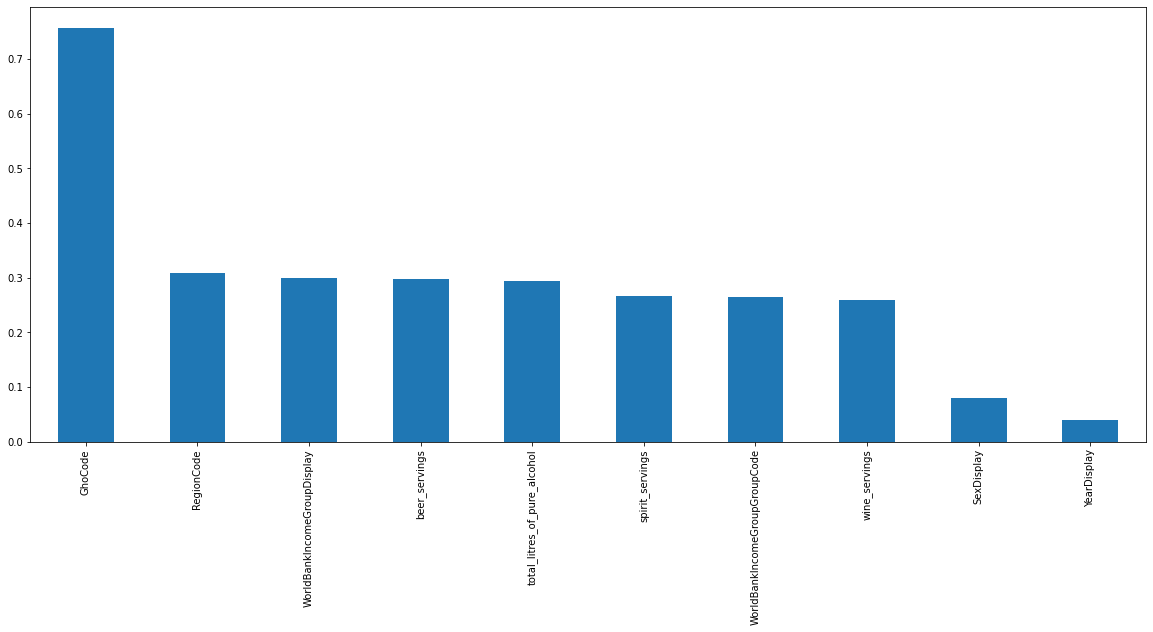

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8)) #plotting mutual_info

In [ ]:
#decreasing the values, giving a standart scale to them
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X 

array([[-1.28781283, -1.1799468 , -0.86790535, ..., -0.54546113,
        -0.65902496,  0.        ],
       [-1.28781283, -1.1799468 , -0.86790535, ...,  0.42173201,
         1.47236387,  1.22474487],
       [-1.28781283, -1.1799468 , -0.86790535, ..., -0.54546113,
        -0.65902496,  0.        ],
       ...,
       [-0.19526041, -0.72031407, -0.68553329, ..., -0.54546113,
        -0.65902496,  0.        ],
       [-0.19526041, -0.72031407, -0.68553329, ..., -0.54546113,
        -0.65902496,  1.22474487],
       [-0.19526041, -0.72031407, -0.68553329, ..., -0.54546113,
        -0.65902496, -1.22474487]])

In [ ]:
#splitting the data for testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [ ]:
#calling linear regression
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#calling logistic regression
from sklearn.linear_model import LogisticRegression
LgR_model=LogisticRegression(max_iter=2000)
LgR_model.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

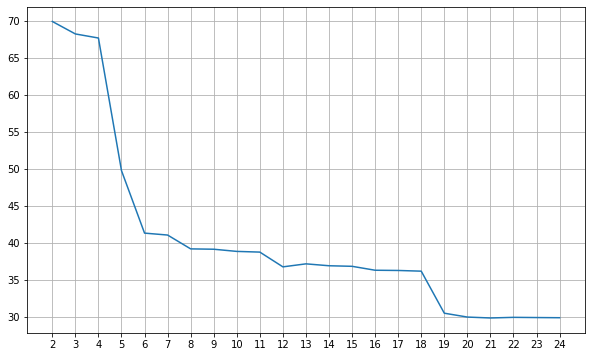

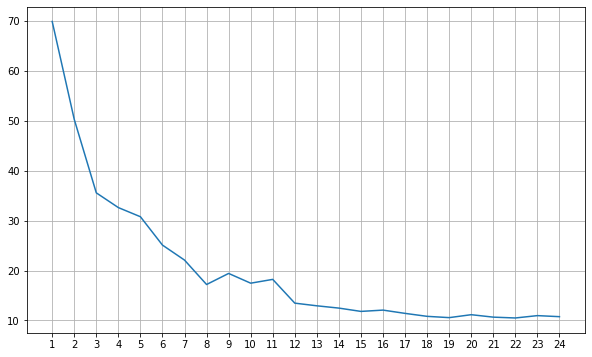

In [ ]:
#finding the best k value for max_leaf_nodes and max_depth in Tree algorithm
from sklearn import metrics
f1 = []
for k in range(2,25):
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.mean_squared_error(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(2,25),f1)
plt.xticks(range(2,25))
plt.grid()
plt.show()

f1 = []
for k in range(1,25):
    dt = tree.DecisionTreeClassifier(max_depth=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.mean_squared_error(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [ ]:
#applying Decision Tree Classifier 
from sklearn import tree
DT_model = tree.DecisionTreeClassifier(max_leaf_nodes=24,max_depth=24)
DT_model = DT_model.fit(x_train, y_train)

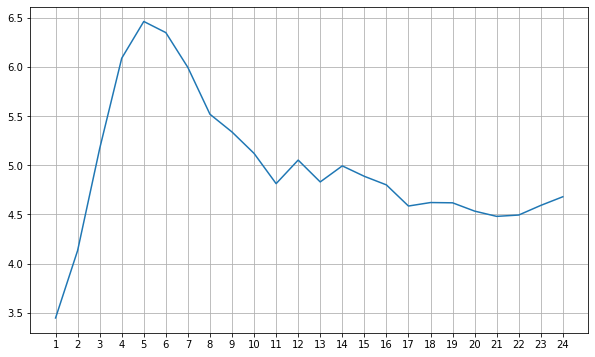

In [ ]:
#finding the number of neighbours for KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
f1 = []
for k in range(1,25):
    knn_model =KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    y_predict = knn_model.predict(x_test)
    f1.append(metrics.mean_absolute_error(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [ ]:
#applying KNeighbors Classifier
knn_model =KNeighborsClassifier(n_neighbors=21)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
#a function to evaluate out model with mean squared error and absolute error.
def evaluation(model):
  score = model.score(x_test, y_test)
  y_predicted=model.predict(x_test)
  mse=metrics.mean_squared_error(y_test,y_predicted)
  mae=metrics.mean_absolute_error(y_test,y_predicted)
  print("Mean Squared error: ", mse)
  print("Mean Absolute error: ", mae)

In [ ]:
evaluation(knn_model) #applying the function

Mean Squared error:  73.50045330915684
Mean Absolute error:  4.479601087941976


In [ ]:
evaluation(LR_model)  #applying the function

Mean Squared error:  61.649098940956776
Mean Absolute error:  6.191758170364084


In [ ]:
evaluation(LgR_model)  #applying the function

Mean Squared error:  35.37262012692656
Mean Absolute error:  4.116047144152312


In [ ]:
evaluation(DT_model)  #applying the function

Mean Squared error:  29.85494106980961
Mean Absolute error:  3.755213055303717


In [ ]:
pd.DataFrame({"Linear Regression": (62,6.19), "Logistic Regression":(35,4.11),"Decision Tree":(30,3.7),"KNeighbours Classifier":(73,4.4)},index=['Mean Squared Error',"Mean Absolute Error"]) #making a table for the errors. 

,Linear Regression,Logistic Regression,Decision Tree,KNeighbours Classifier
Mean Squared Error,62.00,35.00,30.0,73.0
Mean Absolute Error,6.19,4.11,3.7,4.4
